# **<center>Credit Card Fraud Detection</center>**
* **Problem statement** : To detect credit card fraud transaction
* **Resources:**
* https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc
* https://medium.com/analytics-vidhya/credit-card-fraud-detection-web-app-using-streamlit-d653b63909c1

* Dataset Link: 
  * https://www.kaggle.com/mlg-ulb/creditcardfraud)
* Theory abour credit card fraud detection source:
  * https://www.projectpro.io/article/credit-card-fraud-detection-project-with-source-code-in-python/568#mcetoc_1fsobccm65m 

* **What is Credit Card Fraud Detection?**
  * Credit card fraud is a term that has been coined for unauthorized access of payment cards like credit cards or debit cards to pay for using services or goods
  *  Hackers or fraudsters may obtain the confidential details of the card from unsecured websites. When a fraudster compromises an individual's credit/debit card, everyone involved in the process suffers, right from the individual whose confidential data has been leaked to the businesses (generally banks) who issue the credit card and the merchant who is finalizing the transaction with purchase
  * This makes it extremely essential to identify the fraudulent transactions at the onset. Financial institutions and businesses like e-commerce are taking firm steps to flag the fraudsters entering the system.  Various advanced machine learning technologies are at play, assessing every transaction and stemming the fraud users in its nip using behavioral data and transaction patterns
  * The process of automatically differentiating between fraudulent and genuine users is known as “credit card fraud detection” 


* **How does Credit Card Fraud work?** 
  * A credit card is one of the most used financial products to make online purchases and payments  such as gas, groceries, TVs, traveling, shopping bills, and so on because of the non-availability of funds at that instance. Credit cards are of most value that provide various benefits in the form of points while using them for different transactions. There are several categories of credit card fraud that are prevalent in today’s time:

    1. Lost/Stolen cards: People steal credit cards from the mail and use them illegally on behalf of the owner. The process of blocking credit cards that have been stolen and re-issuing them is a hassle for both customers and credit card companies. Some financial institutions keep the credit cards blocked until it is verified that the rightful owner has received the card. 

    2. Card Abuse: The customer buys goods and items on the credit card but has no intention to pay back the amount charged by the bank for the same. These customers stop answering the calls as the deadline to settle the dues approaches. Sometimes they even declare bankruptcy—this type of fraud results in losses of millions every year. 

    3. Identity Theft: The customers apply illegitimate information, and they might even steal the details of a genuine customer to apply for a credit card and then misuse it. In such cases, even card blocking can not stop the credit card from falling into the wrong hands.

    4. Merchant Abuse: Some merchants show illegal transactions (that never occurred) for money laundering. For performing these illicit transactions, legal information of genuine credit card users is stolen to generate replicas of the cards and use it for illegal work.

  * Many traditional old-school techniques have been used since time in-memorial for credit card fraud detection like CVV verification, geolocation tracking, IP Address verification, etc. But over time, the criminals are using more advanced techniques to commit crimes, and it is impossible to prevent them all using only traditional methods. Millions of transactions are processed every second in today’s world, which takes it beyond human intelligence to process all the data to identify the behavioral patterns of the fraudsters. This is where credit card fraud detection using machine learning plays a vital role. 

  * Financial institutions increasingly depend upon automated machine learning systems to make intelligent decisions and protect businesses against substantial losses. These measures play a significant role in reducing the risk while doing online transactions. Like humans, machine learning algorithms learn from past transaction data and use that information to analyze future transactions with the same lens. While machines might not be as intelligent as humans are and might need some supervision on top of it, the advantage lies in the speed of data processing and computation. Also, machines can identify and remember more patterns in vast volumes of data compared to humans. Generally, these algorithms are known as anomaly detection. Let us delve into details in the next section.


**Credit Card Fraud Detection using Machine Learning can be done using**

  1. **Unsupervised Learning** - 
    * Machine Learning Algorithms such as Isolation Forest, One-class SVM, LOF, etc., do not require labeled data for training the model. They identify patterns in the data and try to group the data points based on observed similarities in patterns. 

  2. **Supervised Learning**  
    * Machine Learning Algorithms such as Ensemble Models (RandomForest, XGBoost, LightGBM, etc.), KNN, Neural Networks, Autoencoders, etc. These algorithms are trained on labeled data, and the model learns to predict the labels for the unseen data. Labeled data can be expensive to gather. 


**Challenges in Credit Card Fraud Detection** 
  * The challenges involved in credit card fraud detection project is primarily the data itself. The data is heavily imbalanced, i.e., the count of data labeled as fraudulent is way less than the data labeled as non-fraudulent data. This makes it extremely tricky to train the model as it tends to overfit for the majority class and underfit for the minority class. Techniques like oversampling, undersampling, cost-sensitive learning, etc. can be used to deal with this. The metrics used for the final model are different from standard evaluation metrics of accuracy, AUC-ROC, etc.

  * Another prevalent faced challenge is the quality and quantity of the data. The startups in the early stage do not have much user history data to train extensive models, which makes it difficult to train a robust fraud detection model. A temporary solution to this problem can be sourcing data from an external third party, like scores from credit bureaus. 

**Note : We are going to build a deep leanrning based model**

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import AllKNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import preprocessing
import itertools
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.metrics import matthews_corrcoef
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

**Import google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Ingestion**

**DATASET DESCRIPTION**
* The dataset contains 284,807 transactions among which there are 492 i.e., 0.172% transactions are fraudulent transactions
* It also contains transactions made by a cardholder in 2 days in month of september 2013 
* This dataset is highly unbalanced. Due to security reasons, most of the features in the dataset are transformed using principal component analysis (PCA). V1, V2, V3,…, V28 are PCA applied features and rest features include ‘time’, ‘amount’ and ‘class’ are non-PCA applied features

In [3]:
# reading dataset
path ="/content/drive/MyDrive/Projects/Credit Card Defaulter/creditcard.csv"
df = pd.read_csv(path)
## displaying first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
## shape of dataset
df.shape

(284807, 31)

In [5]:
## checking null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
## count the occurance of unique values in class column
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* Data are higly imbalanced

## **EDA**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


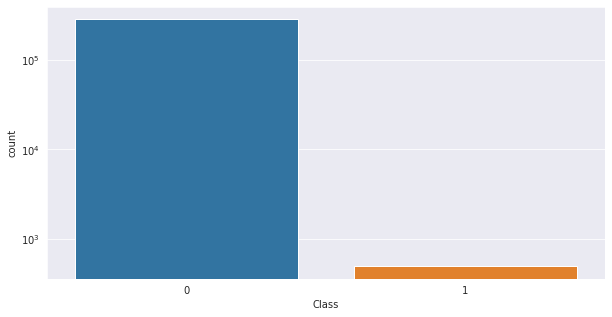

In [7]:
## countplot of classes
plt.figure(figsize=(10, 5))
sns.countplot(df['Class'], log=True);

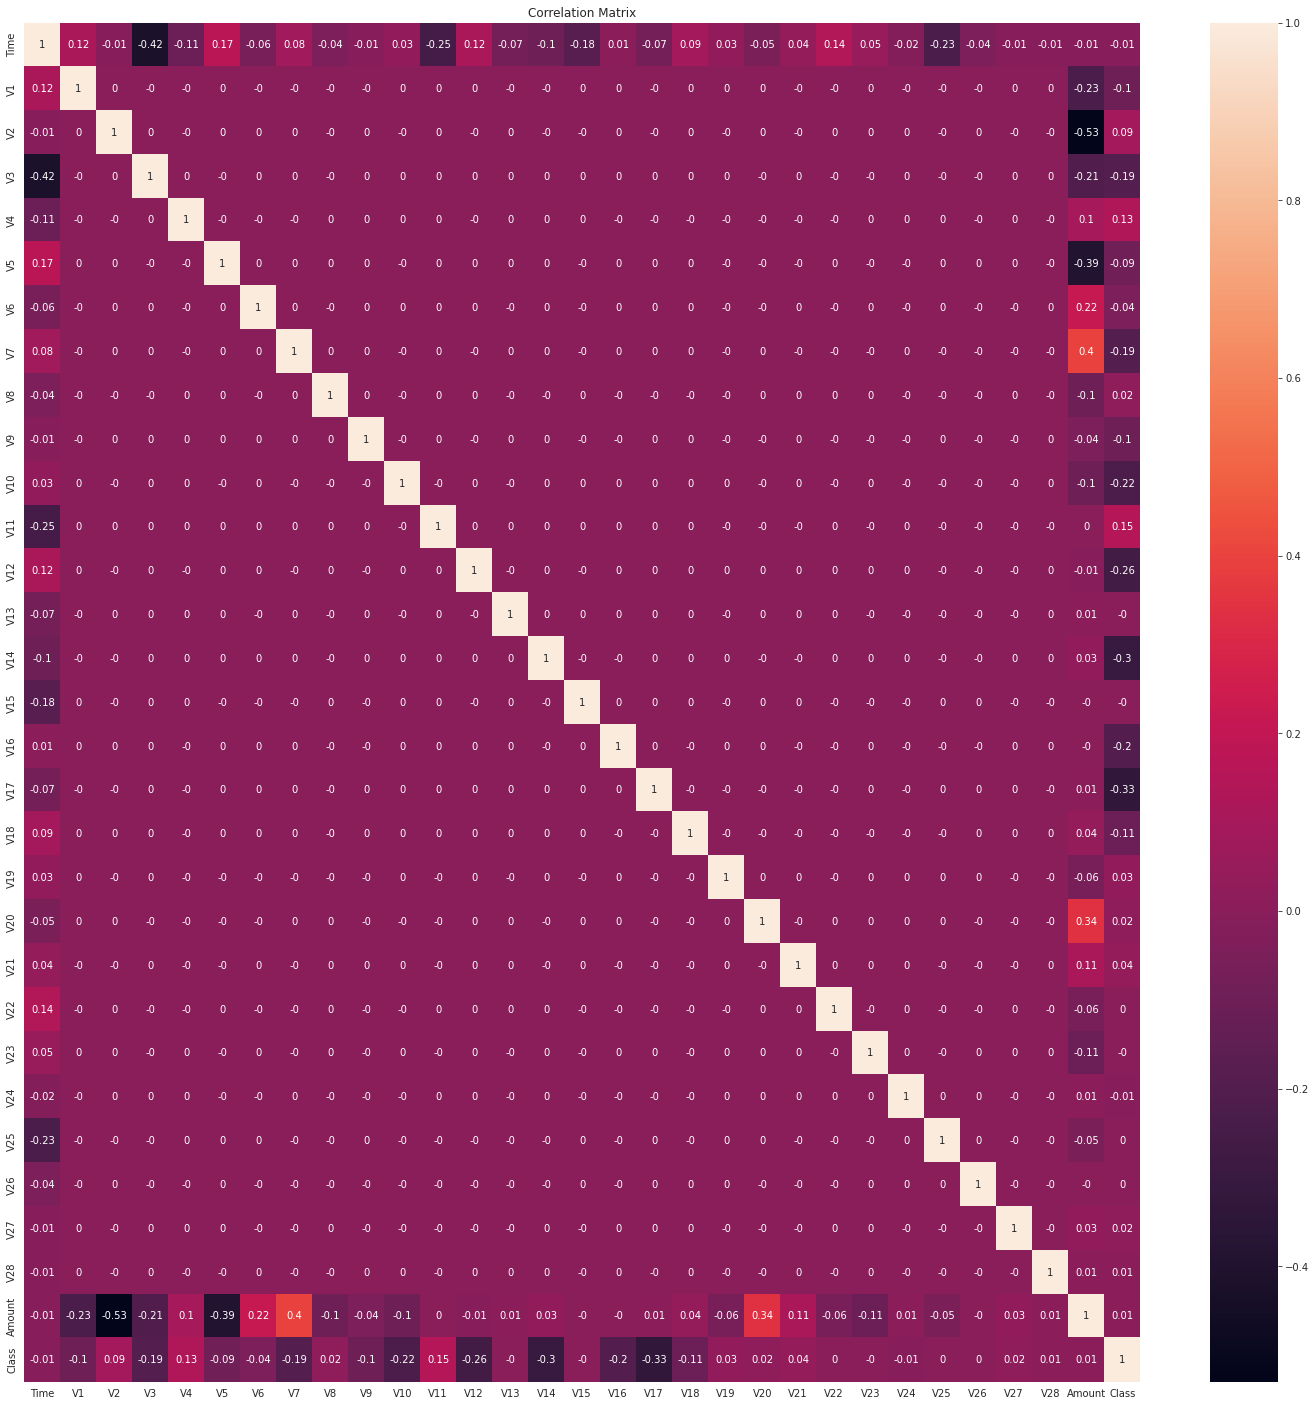

In [8]:
## checking correlation
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [9]:
## checking correlation of 'dependent' variable with each "independent" variable
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [10]:
## dependent and independent variables
df = df.drop(['Time'], axis = 1) 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
# Handle imbalance class
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled = SMOTE(sampling_strategy='minority').fit_resample(X, y)

In [12]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=0)

In [13]:
## Standard Scaler
sc=  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sc_sampled=  StandardScaler()
X_train_sampled = sc.fit_transform(X_train_sampled)
X_test_sampled = sc.transform(X_test_sampled)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(213605, 29)
(71202, 29)
(213605,)
(71202,)


In [15]:
print(X_train_sampled.shape)
print(X_test_sampled.shape)
print(y_train_sampled.shape)
print(y_test_sampled.shape)

(426472, 29)
(142158, 29)
(426472,)
(142158,)


## **Model Building**

In [16]:
# Import libraries
from tensorflow.keras import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout

## **Without SMOTE**

**ANN**

In [17]:
model = Sequential([Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

* For the 1st hidden layer, ‘input_dim’ is the number of input variables. ‘units’ is the number of nodes or neurons in each layer.

* We use Rectified Linear Unit (ReLU) as an activation function for the hidden layers. ReLU normally performs better than Sigmoid and Hyperbolic Tangent functions when building deep neural networks. This is because Sigmoid and Tanh tends to saturate when the input value is either too large or too small. In addition, they only show a high gradient around their mid-points, such as 0.5 for sigmoid and 0 for tanh.

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
14241/14241 [==============================] - 35s 2ms/step - loss: 0.0084 - accuracy: 0.9989
Epoch 2/5
14241/14241 [==============================] - 32s 2ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 3/5
14241/14241 [==============================] - 33s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
14241/14241 [==============================] - 31s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 5/5
14241/14241 [==============================] - 31s 2ms/step - loss: 0.0035 - accuracy: 0.9994


* Note above we use ‘binary_crossentropy’ as the loss function and ‘Adam’ to update network weights. ‘Adam’ is a popular algorithm to achieve good results fast in the deep learning field

* The model weights are updated every 15 samples. If you are not clear with the concept of epoch and batch. An epoch represents one time that the entire training set is fed through the network. A batch defines the number of samples to iterate through before updating the internal model parameters. At the end of the batch, the predictions are compared to the expected output, and error is calculated. Using this error, the optimizer improves the model by moving down the error gradient.

In [19]:
model.evaluate(X_test,y_test)

2226/2226 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9994


[0.0033489777706563473, 0.9993960857391357]

* Now one question for you: does such a high accuracy indicate good performance? If you recall, accuracy is the sum of Ture Negative and True Positive divided by total dataset size. If 95% of the dataset is Negative (non-frauds), the network will cleverly predict all to be Negative, leading to 95% accuracy. However, for fraud detection, detecting Positive matters more than detecting Negative. Therefore, we need better metrics.

* Fig.3 shows the confusion matrix using the test dataset. DNN shows a precision of 85.3%, a recall of 78.9%, and an F1 score of 82.0%. About 20% of frauds are misclassified as non-frauds, leading to these extra payments for the customers, though the accuracy is 99.94%. So there is enough space to improve the DNN model 📣📣.



In [20]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

2226/2226 [==============================] - 3s 1ms/step


In [21]:
print("Accuracy - " + str(accuracy_score(y_test,y_pred)))
print("Recall - " + str(recall_score(y_test,y_pred)))
print("precision - " + str(precision_score(y_test,y_pred)))
print("f1_score - " + str(f1_score(y_test,y_pred)))
print("mcc - " + str(matthews_corrcoef(y_test,y_pred)))

Accuracy - 0.9993960843796522
Recall - 0.7583333333333333
precision - 0.8666666666666667
f1_score - 0.808888888888889
mcc - 0.8103963773906496


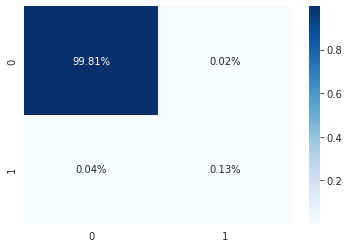

In [22]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred)/np.sum(confusion_matrix(y_test,y_pred)), annot=True, fmt='.2%', cmap='Blues')

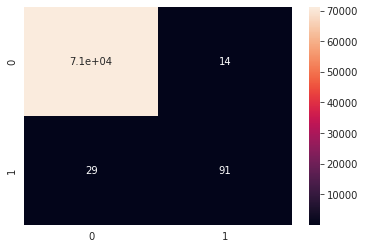

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

## **With Smote**

**ANN**

In [24]:
m_sampled = Sequential([Dense(input_dim = 29, units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),])

In [25]:
m_sampled.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
m_sampled.fit(X_train_sampled, y_train_sampled, batch_size = 15, epochs = 5)

Epoch 1/5
28432/28432 [==============================] - 68s 2ms/step - loss: 0.0555 - accuracy: 0.9800
Epoch 2/5
28432/28432 [==============================] - 65s 2ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 3/5
28432/28432 [==============================] - 67s 2ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 4/5
28432/28432 [==============================] - 67s 2ms/step - loss: 0.0152 - accuracy: 0.9954
Epoch 5/5
28432/28432 [==============================] - 66s 2ms/step - loss: 0.0140 - accuracy: 0.9961


In [26]:
m_sampled.evaluate(X_test_sampled,y_test_sampled)

4443/4443 [==============================] - 6s 1ms/step - loss: 0.0169 - accuracy: 0.9946


[0.016931192949414253, 0.9946256875991821]

In [27]:
y_pred_sampled = m_sampled.predict(X_test_sampled)
y_pred_sampled = np.where(y_pred_sampled>0.5,1,0)

4443/4443 [==============================] - 6s 1ms/step


In [28]:
print("Accuracy - " + str(accuracy_score(y_test_sampled,y_pred_sampled)))
print("Recall - " + str(recall_score(y_test_sampled,y_pred_sampled)))
print("precision - " + str(precision_score(y_test_sampled,y_pred_sampled)))
print("f1_score - " + str(f1_score(y_test_sampled,y_pred_sampled)))
print("mcc - " + str(matthews_corrcoef(y_test_sampled,y_pred_sampled)))

Accuracy - 0.9946256981668284
Recall - 0.9995792544388656
precision - 0.9898064050218037
f1_score - 0.9946688251877076
mcc - 0.9892994861133992


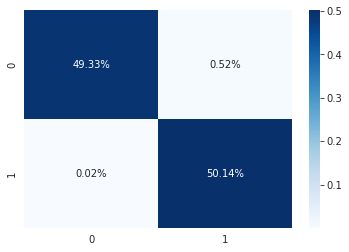

In [29]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test_sampled,y_pred_sampled)/np.sum(confusion_matrix(y_test_sampled,y_pred_sampled)), annot=True, fmt='.2%', cmap='Blues')

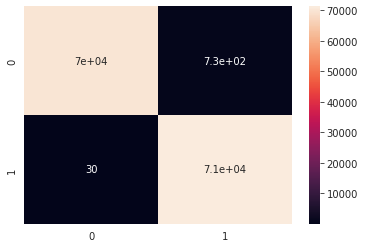

In [30]:
sns.heatmap(confusion_matrix(y_test_sampled,y_pred_sampled), annot=True)

* Decrease the value for 30